The data set for this project is from the UCI Machine Learning Repository.

https://archive.ics.uci.edu/ml/datasets/p53+Mutants 

# Imported the required packages

In [1]:
import pandas as pd
import numpy as np
import re
import scipy
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis

The data set consisted of 2 files – the data file, K9.data and the K9.instance.tags file that contains the names of the mutations. Both files were downloaded to the local hard drive. The .data file was read in using pd.read_csv and saved to a dataframe, ‘df’.

In [3]:
df = pd.read_csv('./K9.data', low_memory=False, header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Columns: 5410 entries, 0 to 5409
dtypes: float64(1), object(5409)
memory usage: 1.3+ GB


In [5]:
df.dtypes

0        object
1        object
2        object
3        object
4        object
         ...   
5405     object
5406     object
5407     object
5408     object
5409    float64
Length: 5410, dtype: object

In [6]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,5400,5401,5402,5403,5404,5405,5406,5407,5408,5409
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,NaN
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,NaN
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,inactive,NaN
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,NaN
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,NaN


There are 31,420 entries and 5410 features and all the columns are of float type except for one which is an object type.

To minimize the confusion between numbered columns and rows, the prefix ‘2D’ was attached to the first 4826 column numbers and the prefix ‘3D’ to the 4827th – 5408th column using string methods to identify the 2D and 3D features. The 5409th column was labeled as ‘Type’ as it indicated the class label. 

In [7]:
# Adding the prefix '2D' and '3D' to the column names. 0-4825 - add 2D. 4826-5407 - add 3D. 
# The column with the labels active/inactive is named 'Type'
columns_string = []
for i in df.columns:
    if int(i) <= 4825:
        i = '2D'+str(i+1)
        columns_string.append(i)
    elif int(i) >= 4826 and  i <= 5407:
        i = '3D'+str(i+1)
        columns_string.append(i)
    elif int(i) == 5408:
        i = 'Type'
        columns_string.append(i)
    else:
        i = i
        columns_string.append(i)
columns_string[-10:]

['3D5401',
 '3D5402',
 '3D5403',
 '3D5404',
 '3D5405',
 '3D5406',
 '3D5407',
 '3D5408',
 'Type',
 5409]

In [8]:
df.columns = columns_string

The tags  or the mutation information of the data set is in another file 'instance.tags'. Read in this data and add it as a feature to df.

In [9]:
tags = pd.read_csv('./K9.instance.tags', header=None)

In [10]:
# Add the tags as a column to the dataframe df.
df['mutations'] = tags

In [11]:
df.head(5)

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,5409,mutations
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,NaN,%a119e
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,NaN,%a119e_l125p
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,inactive,NaN,%a119e_r283k_a353v
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,NaN,%a161t
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,NaN,%c135y


The column with NaNs was dropped. There were also some rows with ‘?’. Since, there were no descriptions of the features available and there were 5408 of them for each mutation, it seemed best to drop all missing values after converting them to NaNs. 

In [12]:
# The column 5409 is all NaN, so dropped it.
df = df.drop([5409], axis=1)

In [13]:
df.head(5)

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5401,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,mutations
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,%a119e
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,%a119e_l125p
2,?,?,?,?,?,?,?,?,?,?,...,?,?,?,?,?,?,?,?,inactive,%a119e_r283k_a353v
3,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,%a161t
4,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,%c135y


In [14]:
# The dataframe has ? and NaN for some values and for full rows. Converted all ? to NaN and dropped it.
df.replace('?', np.nan, inplace = True)

In [15]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [16]:
df.isnull().sum().sum()

0

In [17]:
df.head()

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5401,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,mutations
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.013,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,%a119e
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,-0.008,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,%a119e_l125p
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.01,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,%a161t
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.012,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,%c135y
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.012,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,inactive,%c135y_e285m


In [18]:
sum(df['Type']=='inactive')

31008

In [19]:
sum(df['Type']=='active')

151

In [20]:
df.shape

(31159, 5410)

The ‘mutations’ column contains the mutation information for each entry/row.

For eg:  ‘%a119e_l125p’ denotes 2 point mutations separated by ‘_’, the first one is ‘a119e’ and the second one is ‘l125p’. The ‘a119e’ is read as – amino acid ‘a’ at position 119 of the protein chain is replaced by amino acid ‘e’. Based on the number of ‘_’, the ‘count’ of the mutations was determined and added as a column to the dataframe, df.

In [21]:
def mutation_counter(col):
    ### This function counts the number of mutations in each entry of the dataframe column 'mutations' ###
    ### and returns the length of each type of mutation in 4 different lists ('one','two','three','four','more') ###
    ### and a fifth list, 'count' which contains the designation for each entry as a 1,2,3,4 or >4. ###
    
    count = []                                                       # list for designating the type of mutation
    
    for i in col:                                                       # Iterating through the different entries in the column
        c = i.count('_')                                                # c is the number of '_' in the entry
        if c == 0:                                                      # if c is 0, its a one point mutation
            count.append(1)                                           # designated as a 1 in the count list
        else:                                                    # if c is 1, its a two point mutation
            count.append(c+1)                                           # designated as a 2 in the count list
        
            
    return(count)                            # return the length of each list

In [22]:
# Count the number of each mutation in the dataframe df
count = mutation_counter(df['mutations'])

In [23]:
print(count)

[1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 5, 6, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 3, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 5, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [24]:
# Using the function mutation_counter on the 'mutations' column, generated the list 'count' and added it as another 
# column 'count' to the dataframe

df['count'] = count

In [25]:
df.head()

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5402,3D5403,3D5404,3D5405,3D5406,3D5407,3D5408,Type,mutations,count
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.021,0.02,0.016,-0.011,0.003,0.01,-0.007,inactive,%a119e,1
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.007,0.015,-0.008,-0.011,-0.004,0.013,0.005,inactive,%a119e_l125p,2
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.025,0.025,0.021,-0.012,0.006,0.016,-0.018,inactive,%a161t,1
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.05,0.038,0.051,-0.015,0.017,0.027,-0.049,inactive,%c135y,1
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.009,0.003,-0.001,0.002,-0.006,0.009,0.013,inactive,%c135y_e285m,2


In [26]:
max_count = df['count'].max()
print(max_count)

6


The dataset has 1-6 point mutations. 

In human mammary carcinoma, the mutation sites of p53 tend to occur within one single exon (coding region) or a short distance from another, implying that the distance of mutations may be of importance for affecting the function of p53. Reference: Tao Huang, Shen Niu, Zhongping Xu, Yun Huang, Xiangyin Kong, Yu-Dong Cai and Kuo-Chen (2011) ChouPredicting transcriptional activity of multiple site p53 mutants based on hybrid properties. PLoS One 6(8): e22940. 

Here we used 1,2,3,4 and 5 distance features for 1 pt., 2 pt., 3pt., 4pt., 5pt. and 6pt. mutations. The distance features represent the distance between adjacent mutations, ie., the distance between the first and second mutations (difference in position numbers), second and third, and so on. 

For e.g., in a 3pt. mutation, there will be 2 distance features – one, the distance between the first and second mutation positions and the second, the distance between the second and third mutation positions. Five such distance features named ‘distance1’,…,’distance5’ were added to the data set.

In [27]:
# Adding the distance feature of the mutations - the position of the 2 point where the mutation occurred is taken and 
# the absolute value of their difference is the distance
# For the one point mutation, the dist1 is 0
# for the 2 pt mutation, the dist1 is the distance
# for the 3 pt mutation, dist1 will have 1st diff and dist2 will have the 2nd diff
# for the 4 pt mutation, dist1, dist2 and dist3
# for the 5 pt mutation, dist1, dist2 and dist3, dist4
# for the 6 pt mutation, dist1, dist2 and dist3, dist4, dist5

dist1 = []                                                            # empty lists 'dist1' to 'dist5'
dist2 = []
dist3 = []
dist4 = []
dist5 = []

for i in df['mutations']:                                            # iterating through each entry in 'mutations' column
    c = i.count('_')                                                 # c is the count of '_'
    if c == 0:                                                       # if its 0, then 1 pt mutation
        dist1.append(0)                                              # and all dist lists are appended as 0 for that entry
        dist2.append(0)
        dist3.append(0)
        dist4.append(0)
        dist5.append(0)
    elif c == 1:                                                     # If c is 1, then it is a 2 pt mutation
        a, b = i.strip('%').split('_')                               # strip off '%' and split at '_' and get 2 strings - a & b
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a and b - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)    
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into resp items_a, items_b
            pos1 = int(items_a[1])                                   # the 2nd component of each items is the 
        if match_b:                                                  # position of the aminoacid
            items_b = match_b.groups()                              
            pos2 = int(items_b[1])                                   
        dist1.append(abs(pos1 - pos2))                               # absolute difference of the positions is the distance in dist1
        dist2.append(0)                                              # the rest are appended with '0'
        dist3.append(0)
        dist4.append(0)
        dist5.append(0)
    elif c == 2:                                                     # If c is 2, then it is a 3 pt mutation
        a, b, c = i.strip('%').split('_')                            # strip off '%' and split at '_' and get 3 strings - a,b,c
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a, items_b, items_c
            pos1 = int(items_a[1])                                   # the 2nd component of all items is the position of the aminoacid
        if match_b:    
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        dist1.append(abs(pos1 - pos2))                               # dist 1 has 1st diff and dist2 has 2nd diff
        dist2.append(abs(pos2 - pos3))
        dist3.append(0)                                              # the rest are appended with '0'
        dist4.append(0)
        dist5.append(0)
    elif c == 3:                                                     # If c is 3, then it is a 4 point mutation
        a, b, c, d = i.strip('%').split('_')                         # strip off '%', split at '_' , get 4 strings - a,b,c,d
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c,d - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        match_d = re.match(r"([a-z]+)([0-9]+)([a-z]+)", d, re.I)     
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a,items_b,items_c,items_d
            pos1 = int(items_a[1])                                   
        if match_b:    
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        if match_d:    
            items_d = match_d.groups()                               
            pos4 = int(items_d[1])
        dist1.append(abs(pos1 - pos2))                               # dist1 is 1st diff, dist2 is 2nd diff and dist3 is 3rd diff 
        dist2.append(abs(pos2 - pos3))
        dist3.append(abs(pos3 - pos4))
        dist4.append(0)                                              # the rest are appended with '0'
        dist5.append(0)
    elif c == 4:                                                     # If c is 4, then it is a 5 pt mutation
        a, b, c, d, e = i.strip('%').split('_')                      # strip off '%', split at '_', get 5 strings - a,b,c,d,e
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c,d,e - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        match_d = re.match(r"([a-z]+)([0-9]+)([a-z]+)", d, re.I)     
        match_e = re.match(r"([a-z]+)([0-9]+)([a-z]+)", e, re.I)
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a,items_b,items_c,items_d
            pos1 = int(items_a[1])                                   # and items_e
        if match_b:                                                  # the 2nd component of items_b is the position of the aminoacid
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        if match_d:    
            items_d = match_d.groups()                               
            pos4 = int(items_d[1])
        if match_e:    
            items_e = match_e.groups()                               
            pos5 = int(items_e[1])
        dist1.append(abs(pos1 - pos2))                               # dist1-1st, dist2-2nd, dist3-3rd, dist4-4th
        dist2.append(abs(pos2 - pos3))
        dist3.append(abs(pos3 - pos4))
        dist4.append(abs(pos4 - pos5))
        dist5.append(0)                                              # the rest are appended with '0'
    elif c == 5:                                                     # If c is 5, then it is a 6 pt mutation
        a, b, c, d, e, f = i.strip('%').split('_')                   # strip off '%', split at '_', get 6 strings - a,b,c,d,e,f
        match_a = re.match(r"([a-z]+)([0-9]+)([a-z]+)", a, re.I)     # re for a,b,c,d,e,f - alphabet/number/alphabet
        match_b = re.match(r"([a-z]+)([0-9]+)([a-z]+)", b, re.I)     
        match_c = re.match(r"([a-z]+)([0-9]+)([a-z]+)", c, re.I)
        match_d = re.match(r"([a-z]+)([0-9]+)([a-z]+)", d, re.I)     
        match_e = re.match(r"([a-z]+)([0-9]+)([a-z]+)", e, re.I)
        match_f = re.match(r"([a-z]+)([0-9]+)([a-z]+)", f, re.I)
        if match_a:
            items_a = match_a.groups()                               # group the 3 diff components into items_a, items_b, items_c, items_d
            pos1 = int(items_a[1])                                   # items_e, items_f
        if match_b:                                                  # the 2nd component of items_b is the position of the aminoacid
            items_b = match_b.groups()                               
            pos2 = int(items_b[1])                                   
        if match_c:    
            items_c = match_c.groups()                               
            pos3 = int(items_c[1])
        if match_d:    
            items_d = match_d.groups()                               
            pos4 = int(items_d[1])
        if match_e:    
            items_e = match_e.groups()                               
            pos5 = int(items_e[1])
        if match_f:    
            items_f = match_f.groups()                               
            pos6 = int(items_f[1])
        dist1.append(abs(pos1 - pos2))                                # dist1-1st, dist2-2nd, dist3-3rd, dist4-4th, dist5-5th 
        dist2.append(abs(pos2 - pos3))
        dist3.append(abs(pos3 - pos4))
        dist4.append(abs(pos4 - pos5))
        dist5.append(abs(pos5 - pos6))                  # the rest are appended with '0'
        

In [28]:
# Added the distance lists as columns 
df['distance1'] = dist1
df['distance2'] = dist2
df['distance3'] = dist3
df['distance4'] = dist4
df['distance5'] = dist5

In [29]:
df.head()

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5407,3D5408,Type,mutations,count,distance1,distance2,distance3,distance4,distance5
0,-0.161,-0.014,0.002,-0.036,-0.033,-0.093,0.025,0.005,0.000,-0.015,...,0.01,-0.007,inactive,%a119e,1,0,0,0,0,0
1,-0.158,-0.002,-0.012,-0.025,-0.012,-0.106,0.013,0.005,0.000,-0.002,...,0.013,0.005,inactive,%a119e_l125p,2,6,0,0,0,0
2,-0.169,-0.025,-0.010,-0.041,-0.045,-0.069,0.038,0.014,0.008,-0.014,...,0.016,-0.018,inactive,%a161t,1,0,0,0,0,0
3,-0.183,-0.051,-0.023,-0.077,-0.092,-0.015,0.071,0.027,0.020,-0.019,...,0.027,-0.049,inactive,%c135y,1,0,0,0,0,0
4,-0.154,0.005,-0.011,-0.013,-0.002,-0.115,0.005,0.002,-0.003,0.002,...,0.009,0.013,inactive,%c135y_e285m,2,150,0,0,0,0


There were 31269 ‘inactive’ entries and only 151 ‘active’ entries in the dataset initially. But, after removing the missing values and NaNs, adding the ‘count’ and distance features, the data frame has 31159 entries with 5416 columns. The number of ‘inactive’ entries is now 31008 and 151 ‘active’ entries.

In [30]:
df.shape

(31159, 5416)

In [31]:
# Number of 'active' and 'inactive' records

sum(df['Type'] == 'active')

151

In [32]:
sum(df['Type'] == 'inactive')

31008

In [33]:
# converting everything in the dataframe to numeric
df = df.apply(pd.to_numeric, errors='ignore')

In [34]:
df_cols = df.columns

# Data Story

The 2D features were also known as Surface Property Maps and are just numbers representing the difference between the surface map of 'normal' amino acid (wild-type) and the mutated one. The 3D features, also known as Structure Distance Maps, are also representing difference in magnitude of the distance changes in the 3D structure. This kind of multidimensional data is very hard to visualise for any specific feature correlation. We can try feature selection and dimensionality reduction on the data set and then try to visualise the key components.

For now, the spread of the different types of mutations and their respective distance features can be visualised.

It is important to know how many entries are there for each type of mutation or 'count'. This will tell us which distance feature is also more prevalent. We also need to know the range of the distance features(1-5) - this shows how close together or distant the mutations are.

The data set is skewed with 31008 'inactive' and 151 'active' entries. 

The histogram of the 'count' shows the spread of the different types of mutations in the data set. 

Text(0.5, 1.0, 'Frequency Distribution of different point mutations')

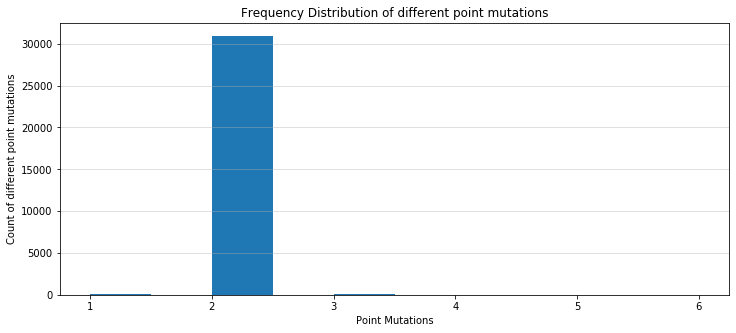

In [35]:
plt.figure(figsize=(12,5))
plt.hist(count)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Point Mutations')
plt.ylabel('Count of different point mutations')
plt.title('Frequency Distribution of different point mutations')

The 2 pt. mutations outnumber the other types and the graph does not show the distribution of the other types. Limiting, the y-axis to a lower value will help see the distribution of the other mutations as well.

Text(0.5, 1.0, 'Frequency Distribution of different point mutations')

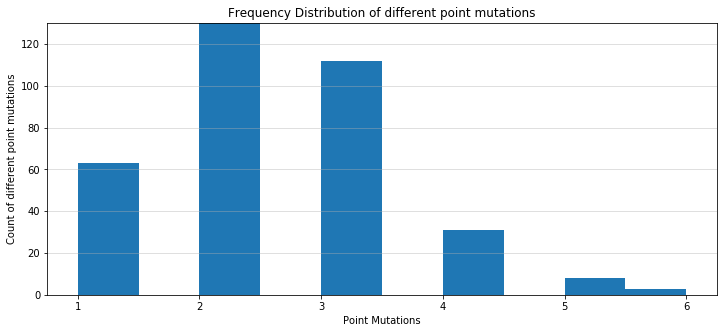

In [36]:
plt.figure(figsize=(12,5))
plt.hist(count)
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,130])
plt.xlabel('Point Mutations')
plt.ylabel('Count of different point mutations')
plt.title('Frequency Distribution of different point mutations')

This shows that the majority of the entries are 2 pt. mutations, with very few of the other types.

The distance features were plotted to see what was the range of the differences between adjacent mutations.

Text(0.5, 1.0, 'Frequency Distribution of distance feature 1')

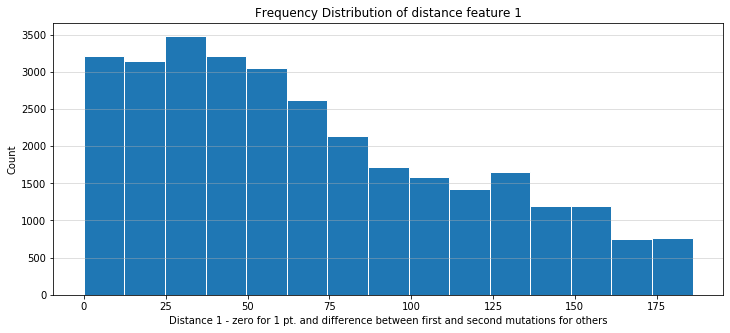

In [37]:
plt.figure(figsize=(12,5))
plt.hist(df.distance1, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Distance 1 - zero for 1 pt. and difference between first and second mutations for others')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 1')

In [38]:
df.distance1.max()

186

The 'distance1' feature which contains the difference in position between the first and second mutations shows that at least half of them lie between 0-75. 

Text(0.5, 1.0, 'Frequency Distribution of distance feature 2')

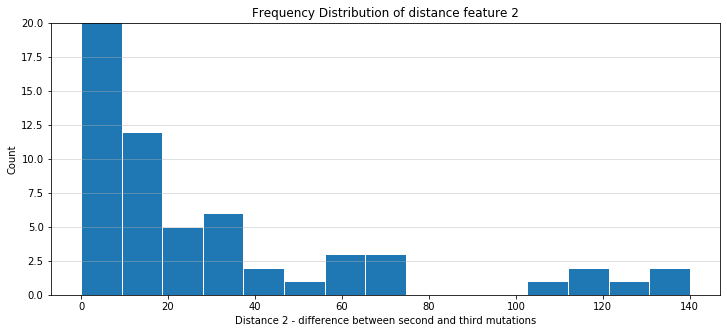

In [39]:
plt.figure(figsize=(12,5))
plt.hist(df.distance2, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,20])
plt.xlabel('Distance 2 - difference between second and third mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 2')

In [40]:
df.distance2.max()

140

The 'distance2' feature shows an even narrower range - most values are between 0-10 ie., the adjacent mutations are really close most of the time. Below, the 'distance3', 'distance4' and 'distance5' were also seen to give a similar result. Most adjacent mutations are located within a distance of 0-20.

Text(0.5, 1.0, 'Frequency Distribution of distance feature 3')

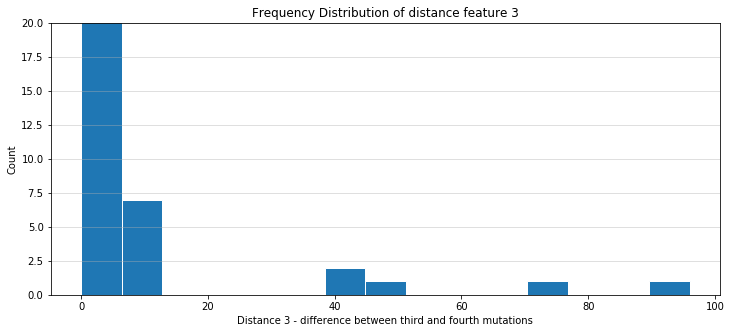

In [42]:
plt.figure(figsize=(12,5))
plt.hist(df.distance3, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,20])
plt.xlabel('Distance 3 - difference between third and fourth mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 3')

In [43]:
df.distance3.max()

96

Text(0.5, 1.0, 'Frequency Distribution of distance feature 4')

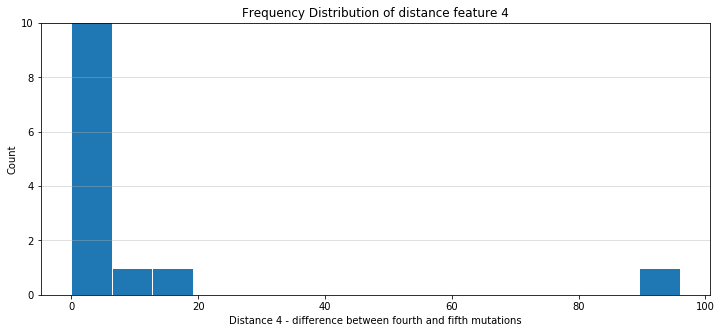

In [45]:
plt.figure(figsize=(12,5))
plt.hist(df.distance4, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,10])
plt.xlabel('Distance 4 - difference between fourth and fifth mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 4')

In [46]:
df.distance4.max()

96

Text(0.5, 1.0, 'Frequency Distribution of distance feature 5')

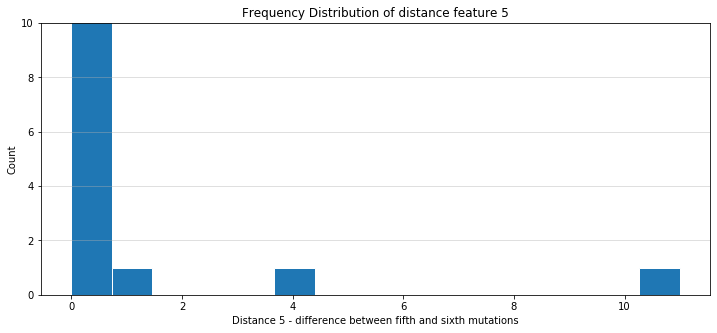

In [47]:
plt.figure(figsize=(12,5))
plt.hist(df.distance5, bins=15,edgecolor='white')
plt.grid(axis='y', alpha=0.5)
plt.ylim([0,10])
plt.xlabel('Distance 5 - difference between fifth and sixth mutations')
plt.ylabel('Count')
plt.title('Frequency Distribution of distance feature 5')

In [48]:
df.distance5.max()

11

# Statistical Analysis

The categorical 'Type' variable is converted to a numerical one to generate the number of active and inactive entries in each type of mutation.

In [145]:
# Preprocessing data
# Encoding the labels or the 'Type' category using label encoder - 1 being 'inactive' and 0 for 'active'
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Type'])
list(le.classes_)

[0, 1]

In [50]:
df['Type'] = le.transform(df['Type'])

In [51]:
# checking the transform
list(le.inverse_transform([0, 1]))

['active', 'inactive']

In [52]:
y = df['Type']
y = np.array(y)

In [53]:
# Number of 'inactive' entries grouped by the different 'count' - 'inactive' is now encoded as 1 - Sum gives total
# of inactive
gr_ct_in = df.groupby('count').Type.sum()
gr_ct_in

count
1       55
2    30877
3       49
4       24
5        2
6        1
Name: Type, dtype: int64

In [54]:
# Total Number of entries grouped by the different 'count'
gr_ct_tot = df.groupby('count').Type.count()
gr_ct_tot

count
1       63
2    30942
3      112
4       31
5        8
6        3
Name: Type, dtype: int64

In [55]:
# the difference between the total entries and the 'inactive' gives the count of 'active' entries
gr_ct_ac = (gr_ct_tot) - (gr_ct_in)

In [56]:
# All the information is put into a dictionary to create a DF.
data = {'Mutations': [1,2,3,4,5,6], 'Inactive': [i for i in gr_ct_in], 'Active': [i for i in gr_ct_ac], 'Total': [i for i in gr_ct_tot]}

The following gives a clear account of the total number of entries for each type of mutation and the number of 'inactive' and 'active' records in them.

In [57]:
gr_ct_data = pd.DataFrame(data)
print(gr_ct_data)

   Mutations  Inactive  Active  Total
0          1        55       8     63
1          2     30877      65  30942
2          3        49      63    112
3          4        24       7     31
4          5         2       6      8
5          6         1       2      3


### Feature Selection

Since there are 5416 features and most of them are already not descriptive, we can reduce the dimensionality by many methods. We will use the filter method for feature selection and then use the principal component analysis (PCA). Apart from dimensionality reduction, PCA also helps in data visualization.

#### Filter Method - Correlation matrix

Feature selection plays a crucial role in classifier design. The most predictive features need to be highly correlated to the target class and least relevant to other features - this can be achieved by generating the correlation matrix and selecting for only those features that are not correlated. We drop features which have a score of more than 0.7 and also try for a score more than 0.9.

There are 4826 '2D' features and 582 '3D' features in the dataset. 

In [58]:
# Select only the numerical inputs from the predictors as df_num, save the column names into num_cols
df_num = df.drop(['Type', 'mutations'], axis=1)
num_cols = df_num.columns
print(df_num.shape)

(31159, 5414)


In [59]:
# correlation matrix of the 2D and 3D features
corrmat = df_num.corr()
corrmat

,2D1,2D2,2D3,2D4,2D5,2D6,2D7,2D8,2D9,2D10,...,3D5405,3D5406,3D5407,3D5408,count,distance1,distance2,distance3,distance4,distance5
2D1,1.000000,0.512035,0.548061,0.331467,0.271928,0.076716,0.036505,0.196495,0.264061,0.251002,...,0.098981,0.079713,-0.132522,-0.000932,-0.066117,0.046879,-0.016423,-0.011724,-0.002059,-0.084150
2D2,0.512035,1.000000,0.828004,0.344972,0.217674,0.199028,0.389890,0.592283,0.699629,0.740739,...,0.006562,-0.021223,-0.028269,0.050079,-0.017587,0.043050,-0.002825,-0.003348,-0.000594,-0.035152
2D3,0.548061,0.828004,1.000000,0.521110,0.470481,0.174281,0.199740,0.484930,0.573419,0.587853,...,0.027766,0.033655,-0.040317,-0.021829,-0.033677,0.037653,-0.003423,-0.008955,0.000262,-0.067219
2D4,0.331467,0.344972,0.521110,1.000000,0.728535,0.131094,0.052930,0.218118,0.262907,0.273347,...,0.014211,-0.030978,-0.040897,0.074768,-0.034588,0.042293,-0.003920,-0.000139,0.009783,-0.070756
2D5,0.271928,0.217674,0.470481,0.728535,1.000000,0.037602,-0.033725,0.157559,0.192000,0.203865,...,-0.009606,-0.110549,-0.034535,0.193429,-0.039565,0.060968,-0.003891,0.004071,0.014571,-0.090878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
distance1,0.046879,0.043050,0.037653,0.042293,0.060968,-0.005950,0.063932,0.022228,0.028076,0.030230,...,-0.026776,0.007083,-0.027604,0.067813,-0.003845,1.000000,-0.014778,0.000174,0.011949,-0.002520
distance2,-0.016423,-0.002825,-0.003423,-0.003920,-0.003891,-0.004118,-0.003688,-0.000598,-0.001701,-0.002465,...,-0.014568,-0.012843,0.016597,0.002503,0.360478,-0.014778,1.000000,0.146967,0.021401,0.023801
distance3,-0.011724,-0.003348,-0.008955,-0.000139,0.004071,-0.002512,-0.002055,-0.001483,-0.001613,-0.001231,...,-0.007224,-0.008572,0.008806,0.004212,0.346826,0.000174,0.146967,1.000000,0.331907,0.028511
distance4,-0.002059,-0.000594,0.000262,0.009783,0.014571,-0.001202,-0.000923,-0.000822,-0.000537,-0.000733,...,-0.003765,-0.000957,0.004277,-0.002294,0.204916,0.011949,0.021401,0.331907,1.000000,0.019067


In [60]:
# Dropped the features with correlation higher than 0.9

cols = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.9:
            if cols[j]:
                cols[j] = False
selected_columns = df_num.columns[cols]

# The selected features were used to create another dataframe df_num_selected
df_num_selected = df_num[selected_columns]
sel_numcols = df_num_selected.columns

In [144]:
df_num_selected.shape

(31159, 3789)

In [146]:
# Dropped the features with correlation higher than 0.7

cols7 = np.full((corrmat.shape[0],), True, dtype=bool)
for i in range(corrmat.shape[0]):
    for j in range(i+1, corrmat.shape[0]):
        if corrmat.iloc[i,j] >= 0.7:
            if cols7[j]:
                cols7[j] = False
selected_columns7 = df_num.columns[cols7]

# The selected features were used to create another dataframe df_num_selected7
df_num_selected7 = df_num[selected_columns7]
sel_numcols7 = df_num_selected7.columns

In [147]:
df_num_selected7.shape

(31159, 1670)

When the cut off score was 0.9, we dropped only 1625 features but when the cut off was lowered to 0.7, 3744 features were dropped. Both the dataframes selected for different cut off scores were used for PCA.

### Feature Scaling

Feature scaling is done to before applying PCA.

In [62]:
from sklearn.preprocessing import minmax_scale

In [63]:
# This is for the entire data before correlation matrix
X_scaled = minmax_scale(df_num)

In [152]:
# This is for the data selected for a score less than 0.9
X9_scaled = minmax_scale(df_num_selected)

In [153]:
# This is for the data selected for a score less than 0.7
X7_scaled = minmax_scale(df_num_selected7)

### PCA 

### PCA - using data selected by removing correlated features with a score more than 0.7

In [157]:
df_pca7 = pd.DataFrame(X7_scaled,columns=sel_numcols7)

In [158]:
from sklearn.decomposition import PCA
pca7 = PCA()
pca_c7 = pca7.fit(df_pca7)

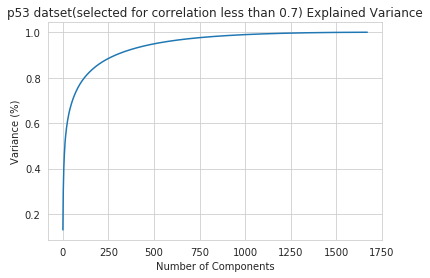

In [160]:
# Figure showing the number of components needed to explain the variance in the dataset.
plt.figure()
plt.plot(np.cumsum(pca_c7.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('p53 datset(selected for correlation less than 0.7) Explained Variance')
plt.show()

The above graph shows that at least 250 components are needed to explain 90% of the variation.

### PCA - using data selected by removing correlated features with a score more than 0.9

In [161]:
df_pca9 = pd.DataFrame(X9_scaled,columns=sel_numcols)

In [164]:
pca9 = PCA()
pca_c9 = pca9.fit(df_pca9)

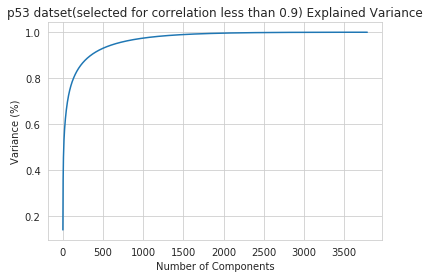

In [165]:
# Figure showing the number of components needed to explain the variance in the dataset.
plt.figure()
plt.plot(np.cumsum(pca_c9.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('p53 datset(selected for correlation less than 0.9) Explained Variance')
plt.show()

The above graph shows that at least 500 components are needed to explain 95% of the variation. 

Let us do the PCA on the entire data and see if this changes the %age of explained variation.

### PCA - using entire data 

In [81]:
# Using the entire scaled data for PCA
# created a dataframe of the scaled numerical values and the label 'y' - convert the values of 'y' to a string
df_pca = pd.DataFrame(X_scaled,columns=num_cols)
df_pca['y'] = y
df_pca['label'] = df_pca['y'].apply(lambda i: str(i))

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
pca_c = pca.fit(df_pca[num_cols])

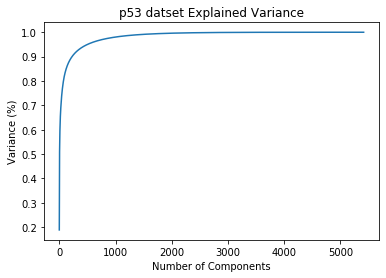

In [66]:
plt.figure()
plt.plot(np.cumsum(pca_c.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('p53 dataset Explained Variance')
plt.show()

Approx. 500 components explain 95% of the variation. This is not too different from the previous graphs.

The explained variation is not any different. Hence, we can choose to use PCA as it shows the number of components needed to explain 90% of the variation without having to drop any features or selecting a cut off score for correlation.

#### Visualising the PCA plot

In [88]:
# PCA using 2 components
pca_2 = PCA(n_components=2)
pc_2 = pca_2.fit_transform(X_scaled)

In [89]:
# convert the principal components of the data into a dataframe
principalDF = pd.DataFrame(data=pc_2, columns=['pca1', 'pca2'])

In [135]:
# concat the 'Type' label with this dataframe to make final_pcadf. This will have the principal components 
# 1 and 2 with the 'Type'
final_pcadf = pd.concat([principalDF, df[['Type']]],axis=1)

In [95]:
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))

Explained variation per principal component: [0.1885016  0.10457065]


The first 2 components only explain about 30% of the variation in the data. But, we can still try to visualise the data using these 2 components.

Text(0.5, 1.0, 'PCA plot with Active and Inactive labels')

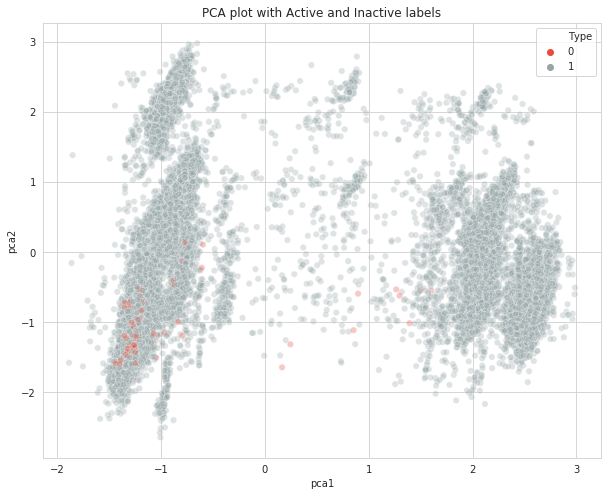

In [137]:
# plot pca1 and pca2 with 'Type' as hue.
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
flatui = ["#e74c3c","#95a5a6" ]
sns.scatterplot(
    x='pca1', y='pca2',
    hue='Type',
    palette=sns.color_palette(flatui, 2),
    data=final_pcadf,
    legend="full",
    alpha=0.3, s=40
)
plt.title("PCA plot with Active and Inactive labels")

The plot shows the 'active' red colored entries and the majority of the 'inactive' grey colored entries. Initially, we could not visualise anything in such high dimensional data - but with PCA even if these components only explain 30% of the variation, we can get a visualisation.

Instead of the 'Type' marked out in these plots, we can try to see the spread of the different kind of mutations by using the 'count' variable.

#### Visualising the PCA plot with 'count' as the category

In [101]:
# Generated another dataframe by dropping the 'count' column
df_c = df.drop(['Type', 'mutations','count'], axis=1)
num_cols_c = df_c.columns
print(df_c.shape)

(31159, 5413)


In [108]:
# Preprocessing the 'count' as categories 0,1,2,3,4,5
le = preprocessing.LabelEncoder()
le.fit(df['count'])
list(le.classes_)

[0, 1, 2, 3, 4, 5]

In [109]:
df['count'] = le.transform(df['count'])

In [111]:
list(le.inverse_transform([0,1,2,3,4,5]))

[0, 1, 2, 3, 4, 5]

In [122]:
c = df['count']

In [114]:
# Scaled this dataframe
X_c = minmax_scale(df_c)

In [115]:
# Fit pca, convert the pcs to dataframe and concat the 'count' feature to this
pc = pca_2.fit_transform(X_c)
pDF = pd.DataFrame(data=pc_2, columns=['pca1', 'pca2'])

In [167]:
final_pc = pd.concat([pDF, c, df[['Type']]],axis=1)

Text(0.5, 1.0, 'PCA plot with Counts as labels')

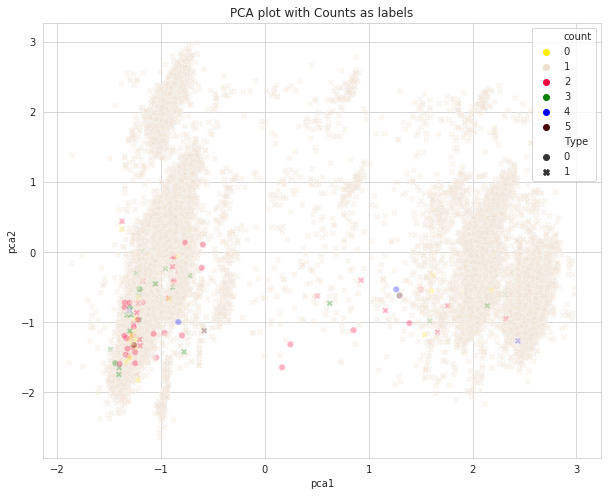

In [169]:
# plot the pca1 and pca2 with 'count' as the hue.
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
flatui = ["#fdee00", "#efdecd", "#ff033e", "#008000", "#0000ff", "#480607"]
sns.scatterplot(
    x='pca1', y='pca2',
    hue='count',
    style='Type',
    palette=sns.color_palette(flatui, 6),
    data=final_pc,
    legend="full",
    alpha=0.3, s=40)
plt.title("PCA plot with Counts as labels")

This PCA plot shows the 'count' and the 'Type' variables. With less than half of the variation being represented, its very hard to make a clear sense of the clusters in the graph.